In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('train.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
df = df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], axis = 1)
df.head(2)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

В этих столбцах числовые данные представлены строкой. Исправляем

In [6]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit','Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']
for i in N_to_fix:
    #df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(float)
    df[i] = pd.to_numeric(df[i], errors='coerce')
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


Здесь дата представлена словами. Исправляем

In [7]:
def parse_years_and_months(arg):
    if isinstance(arg,str):
        age_parts=arg.split("Years and")
        years=int(age_parts[0]) if "Years" in arg else 0
        months_parts=age_parts[1].split("Months")[0] if "Months" in arg else 0
        months=int(months_parts)
        age=years*12 + months
        return age
    else:
        return 0
df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_years_and_months)

работа с категориальыми признаками

In [8]:
m={"Poor":0, "Standard":1, "Good":2}
df["Credit_Score"] = df["Credit_Score"].map(m)

m={"Bad":0, "Standard":1, "Good":2, '_': np.nan}
df["Credit_Mix"] = df["Credit_Mix"].map(m)

m={"No":0, "Yes":1, 'NM': np.nan}
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].map(m)

m = {
    'High_spent_Small_value_payments' : 0,
    'Low_spent_Large_value_payments' : 5,
    'Low_spent_Medium_value_payments': 4,
    'Low_spent_Small_value_payments': 1,
    'High_spent_Medium_value_payments' : 3,
    'High_spent_Large_value_payments' : 2
}

df['Payment_Behaviour'] = df['Payment_Behaviour'].map(m)

df[df['Payment_Behaviour'] == '!@9#%8'] = np.nan

df = df.drop('Type_of_Loan', axis = 1)

labelencoder = LabelEncoder()
df['Occupation'] = labelencoder.fit_transform(df['Occupation'].values)
df['Credit_Score'] = labelencoder.fit_transform(df['Credit_Score'].values)

заменяем пропущенные значения на медиану

In [9]:
df.loc[df['Age'] == -500, 'Age'] = df[df['Age'] > -500]['Age'].median()

In [10]:
df.isna().sum()

Age                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [11]:
def repl_nan(dataframe, column_name):
    median_value = dataframe[column_name].median()
    dataframe[column_name] = dataframe[column_name].fillna(median_value)
    return dataframe
repl_nan(df,'Monthly_Inhand_Salary')
repl_nan(df,'Num_Credit_Inquiries')
repl_nan(df,'Payment_of_Min_Amount')
repl_nan(df,'Payment_Behaviour')
repl_nan(df,'Credit_Mix')
repl_nan(df,'Age')
repl_nan(df,'Annual_Income')
repl_nan(df,'Num_of_Loan')
repl_nan(df,'Num_of_Delayed_Payment')
repl_nan(df,'Changed_Credit_Limit')
repl_nan(df, 'Outstanding_Debt')
repl_nan(df, 'Amount_invested_monthly')
repl_nan(df, 'Monthly_Balance')
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,0.0,312.494089,2
1,23.0,12,19114.12,3093.745000,3.0,4.0,3.0,4.0,-1.0,14.0,...,2.0,809.98,31.944960,0.0,0.0,49.574949,118.280222,5.0,284.629162,2
2,33.0,12,19114.12,3093.745000,3.0,4.0,3.0,4.0,3.0,7.0,...,2.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,4.0,331.209863,2
3,23.0,12,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,...,2.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,1.0,223.451310,2
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,...,2.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,3.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,1.0,502.38,34.663572,378.0,0.0,35.104023,60.971333,2.0,479.866228,0
99996,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,1.0,502.38,40.565631,379.0,0.0,35.104023,54.185950,3.0,496.651610,0
99997,25.0,9,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,6.0,...,2.0,502.38,41.255522,380.0,0.0,35.104023,24.028477,2.0,516.809083,0
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,...,2.0,502.38,33.638208,381.0,0.0,35.104023,251.672582,5.0,319.164979,1


In [12]:
df = df.drop(['Age', 'Occupation'], axis = 1)

## Работа с выбросами

In [13]:
y = df['Credit_Score']
df = df.drop('Credit_Score', axis = 1)

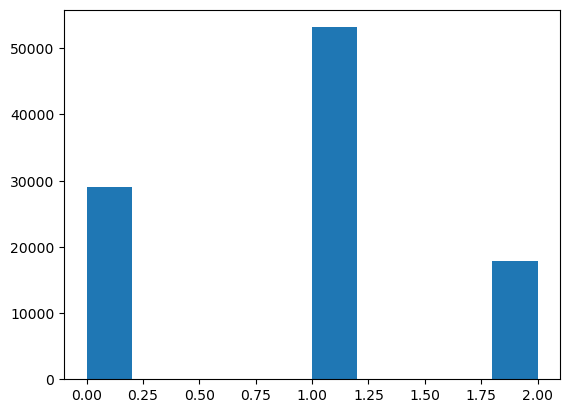

In [14]:
plt.hist(y)
plt.show()

In [15]:
def replace_negative_with_median(df):
    for column in df.columns:
        median = df[column][df[column] >= 0].median()  # Вычисляем медиану столбца, исключая отрицательные значения
        df[column] = df[column].apply(lambda x: median if x < 0 else x)  # Заменяем отрицательные значения на медиану
    return df


df = replace_negative_with_median(df)

lst = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

def replace_outliers_with_median(df, exclude_columns=None):
    for column in df.columns:
        if exclude_columns and column in exclude_columns:
            continue  # Пропускаем столбец, если он находится в списке исключений
        q3 = np.quantile(df[column], 0.75)  # Вычисляем третий квантиль столбца
        median = df[column].median()  # Вычисляем медиану столбца
        df[column] = df[column].apply(lambda x: median if x > q3 else x)  # Заменяем значения больше q3 на медиану
    return df

df = replace_outliers_with_median(df, exclude_columns=lst)
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,0.0,312.494089
1,19114.12,3093.745000,3.0,4.0,3.0,4.0,18.0,14.0,11.27,4.0,2.0,809.98,31.944960,0.0,0.0,49.574949,118.280222,5.0,284.629162
2,19114.12,3093.745000,3.0,4.0,3.0,4.0,3.0,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,4.0,331.209863
3,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,1.0,223.451310
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,2.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,3.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,1.0,502.38,34.663572,208.0,0.0,35.104023,60.971333,2.0,336.731225
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,1.0,502.38,32.305784,208.0,0.0,35.104023,54.185950,3.0,336.731225
99997,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,3.0,2.0,502.38,32.305784,208.0,0.0,35.104023,24.028477,2.0,336.731225
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,11.50,3.0,2.0,502.38,33.638208,208.0,0.0,35.104023,128.954538,5.0,319.164979


# Кластерный анализ

In [49]:
#df_new = df.drop('Credit_Score', axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-0.97622511, -0.83630681, -0.91958403, ..., -0.69010744,
        -1.50680865,  0.02423718],
       [-0.97622511,  0.36308324, -0.91958403, ...,  0.15151971,
         1.7926182 , -0.35141815],
       [-0.97622511,  0.36308324, -0.91958403, ..., -0.66156283,
         1.13273283,  0.27655007],
       ...,
       [ 0.44104653,  0.61420038, -0.39365364, ..., -1.94342234,
        -0.18703791,  0.35098519],
       [ 0.44104653,  0.61420038, -0.39365364, ...,  0.3887787 ,
         1.7926182 ,  0.11416942],
       [ 0.29747044,  0.61420038, -0.39365364, ...,  1.23806088,
        -0.18703791,  1.11864351]])

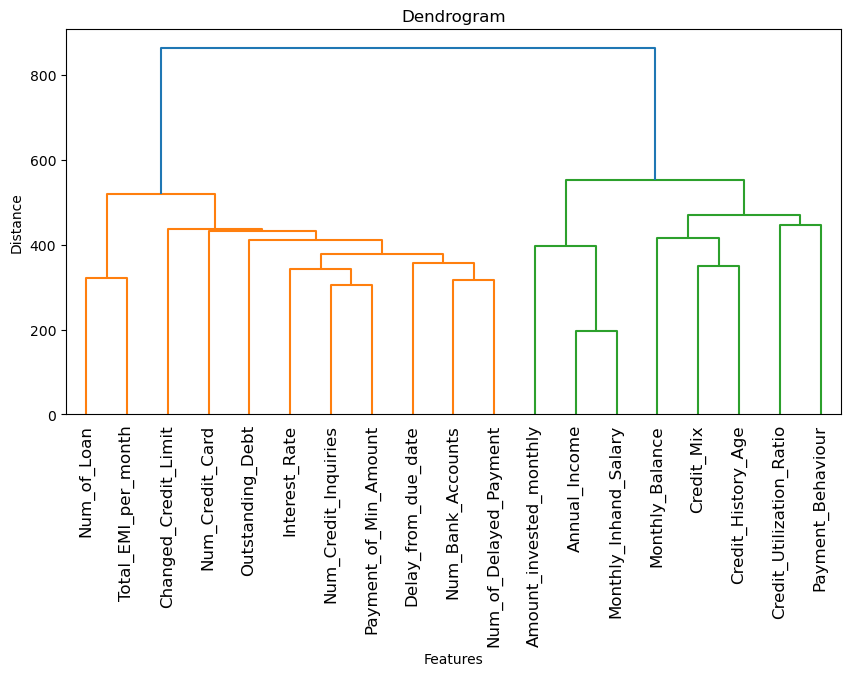

In [50]:
plt.figure(figsize=(10, 5))
dend = hierarchy.dendrogram(hierarchy.linkage(X.T,  method='ward'),
                            labels=df.columns,
                            leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [51]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

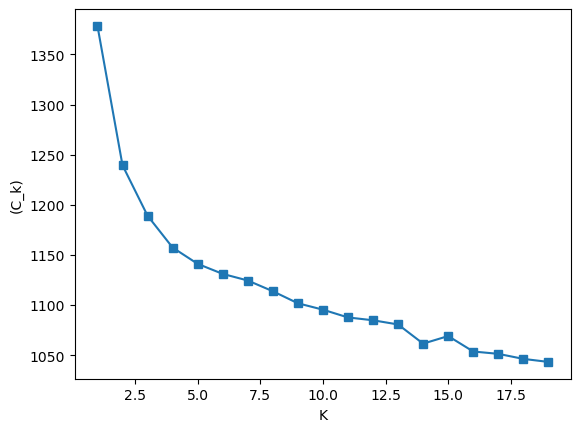

In [52]:
#plt.figure(figsize = (10, 8))
inertia = []
for k in range(1,20):
    mbk = MiniBatchKMeans(n_clusters=k, init='random', random_state=1).fit(X)
    inertia.append(np.sqrt(mbk.inertia_))
plt.plot(range(1, 20),inertia,marker='s')
plt.xlabel('K')
plt.ylabel('(C_k)')
plt.show()

In [31]:
def standardize_dataframe(df):
    scaler = StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_standardized
df_cluster = standardize_dataframe(df)
df_cluster

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,cluster
0,-0.976225,-0.836307,-0.919584,-0.659943,-1.693842,1.041204,-1.800354,-1.159770,1.002279,-0.291324,-0.081518,-0.290863,-1.110481,1.237858,-1.343023,-0.250108,-0.690107,-1.506809,0.024237,0.474279
1,-0.976225,0.363083,-0.919584,-0.659943,-1.693842,1.041204,0.396418,0.475792,1.002279,-0.291324,1.442759,-0.290863,0.379445,-2.094561,-1.343023,-0.250108,0.151520,1.792618,-0.351418,0.474279
2,-0.976225,0.363083,-0.919584,-0.659943,-1.693842,1.041204,-1.800354,-1.159770,0.434024,-0.291324,1.442759,-0.290863,-0.590777,1.263008,-1.343023,-0.250108,-0.661563,1.132733,0.276550,0.474279
3,-0.976225,0.363083,-0.919584,-0.659943,-1.693842,1.041204,-1.507451,-1.860726,-0.517119,-0.291324,1.442759,-0.290863,0.214494,1.275583,-1.343023,-0.250108,1.955867,-0.846923,-1.176175,0.474279
4,-0.976225,-0.836307,-0.919584,-0.659943,-1.693842,1.041204,-1.361000,0.475792,1.002279,-0.291324,1.442759,-0.290863,-1.699568,1.288159,-1.343023,-0.250108,-1.556856,0.472847,0.415129,0.474279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.441047,0.614200,-0.393654,0.741731,-0.873868,-0.469868,1.128675,-1.159770,1.072171,-0.691220,-0.081518,-0.972238,1.170202,0.521074,-1.343023,-0.635840,-1.122290,-0.187038,0.350985,-0.412091
99996,0.441047,0.614200,-0.393654,0.741731,-0.873868,-0.469868,0.396418,-1.159770,1.072171,-0.691220,-0.081518,-0.972238,0.484397,0.521074,-1.343023,-0.635840,-1.273109,0.472847,0.350985,-0.412091
99997,0.441047,0.614200,-0.393654,0.741731,0.356092,-0.469868,1.714481,-1.393422,1.072171,-0.691220,1.442759,-0.972238,0.484397,0.521074,-1.343023,-0.635840,-1.943422,-0.187038,0.350985,-0.412091
99998,0.441047,0.614200,-0.393654,0.741731,-0.873868,-0.469868,0.689321,0.475792,1.072171,-0.691220,1.442759,-0.972238,0.871956,0.521074,-1.343023,-0.635840,0.388779,1.792618,0.114169,-0.412091


In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)

clusters = kmeans.fit_predict(X)
clusters

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
clusters.shape

(100000,)

In [55]:
#df_cluster['cluster'] = clusters
df['cluster'] = clusters
df_cluster['cluster'].value_counts()

1    37025
2    35027
0    27948
Name: cluster, dtype: int64

In [56]:
f = df[df['cluster'] == 0]
df[df['cluster'] == 0].describe().T['mean']

Annual_Income               17578.661414
Monthly_Inhand_Salary        1560.011914
Num_Bank_Accounts               5.732396
Num_Credit_Card                 5.289967
Interest_Rate                  13.732575
Num_of_Loan                     3.038214
Delay_from_due_date            18.055496
Num_of_Delayed_Payment         13.951088
Changed_Credit_Limit            8.773492
Num_Credit_Inquiries            6.021969
Credit_Mix                      0.652068
Outstanding_Debt             1117.349879
Credit_Utilization_Ratio       30.276051
Credit_History_Age            136.301739
Payment_of_Min_Amount           0.947152
Total_EMI_per_month            47.205893
Amount_invested_monthly        81.594534
Payment_Behaviour               2.086804
Monthly_Balance               282.571031
cluster                         0.000000
Name: mean, dtype: float64

In [58]:
s = df[df['cluster'] == 1]
df[df['cluster'] == 1].describe().T['mean']

Annual_Income               35620.771332
Monthly_Inhand_Salary        2904.454092
Num_Bank_Accounts               3.209372
Num_Credit_Card                 4.405834
Interest_Rate                   7.284700
Num_of_Loan                     1.965618
Delay_from_due_date            10.885888
Num_of_Delayed_Payment          8.750007
Changed_Credit_Limit            6.457258
Num_Credit_Inquiries            2.815989
Credit_Mix                      1.643268
Outstanding_Debt              727.365027
Credit_Utilization_Ratio       30.917850
Credit_History_Age            206.095395
Payment_of_Min_Amount           0.143822
Total_EMI_per_month            49.674391
Amount_invested_monthly       119.529171
Payment_Behaviour               2.359514
Monthly_Balance               332.320687
cluster                         1.000000
Name: mean, dtype: float64

In [59]:
th = df[df['cluster'] == 2]
df[df['cluster'] == 2].describe().T['mean']

Annual_Income               43233.531922
Monthly_Inhand_Salary        3420.940189
Num_Bank_Accounts               5.590345
Num_Credit_Card                 5.230108
Interest_Rate                  13.497502
Num_of_Loan                     2.983441
Delay_from_due_date            17.747823
Num_of_Delayed_Payment         13.774888
Changed_Credit_Limit            8.932846
Num_Credit_Inquiries            5.718046
Credit_Mix                      0.750335
Outstanding_Debt             1026.930924
Credit_Utilization_Ratio       30.637939
Credit_History_Age            148.921832
Payment_of_Min_Amount           0.928912
Total_EMI_per_month            78.147815
Amount_invested_monthly       126.769670
Payment_Behaviour               2.359922
Monthly_Balance               310.279399
cluster                         2.000000
Name: mean, dtype: float64

In [37]:
sample = df_cluster.sample(5000)

In [38]:
sample['cluster'].value_counts()

1    1883
2    1756
0    1361
Name: cluster, dtype: int64

In [39]:
y_real = y

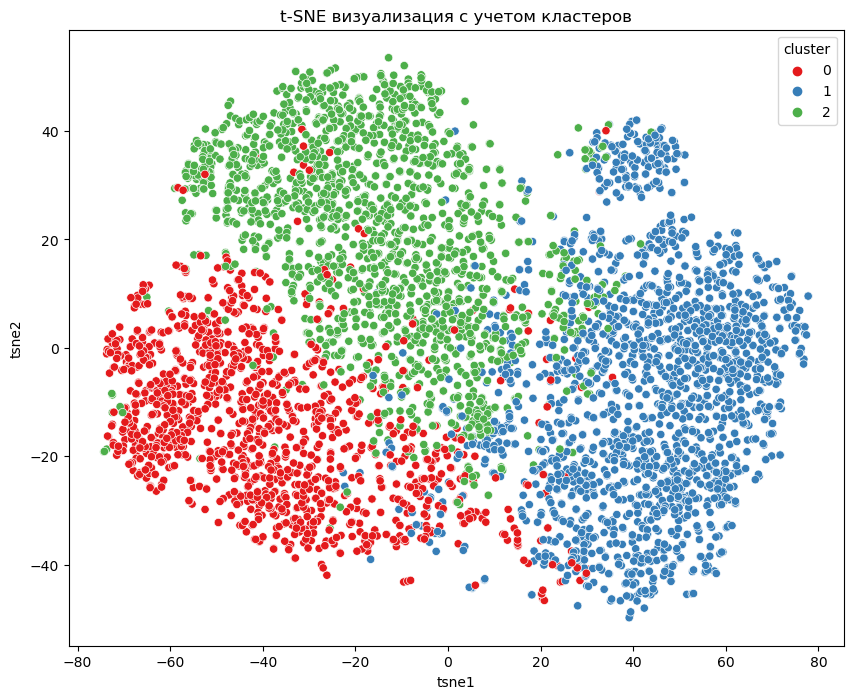

In [40]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Выделение признаков и целевой переменной (в данном случае cluster)
X = sample.drop('cluster', axis=1)

y = sample['cluster']

# Применение t-SNE для снижения размерности до 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Создание нового датафрейма с данными после применения t-SNE
df_tsne = pd.DataFrame(data=X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['cluster'] = y.values

# Визуализация с помощью scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_tsne, palette='Set1', legend='full')
plt.title('t-SNE визуализация с учетом кластеров')
plt.show()


In [41]:
df = df.drop('cluster', axis = 1)

1. F-статистика (F-Score):
   - Чем выше значение F-статистики, тем более значимым является влияние данного признака на разделение данных на кластеры.
   - F-статистика показывает отношение между дисперсией между группами к дисперсии внутри групп.
   - Большие значения F-статистики указывают на более сильное различие между кластерами, вызванное этим признаком.

In [43]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(df, clusters)

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': df.columns, 'F-Score': f_scores, 'P-Value': p_values})
feature_importance_df = feature_importance_df.sort_values(by='F-Score', ascending=False)

print(feature_importance_df)

                     Feature       F-Score        P-Value
14     Payment_of_Min_Amount  88707.409364   0.000000e+00
0              Annual_Income  50834.949875   0.000000e+00
1      Monthly_Inhand_Salary  50178.997633   0.000000e+00
10                Credit_Mix  45904.424045   0.000000e+00
4              Interest_Rate  32150.199491   0.000000e+00
2          Num_Bank_Accounts  31446.070600   0.000000e+00
9       Num_Credit_Inquiries  26474.457084   0.000000e+00
7     Num_of_Delayed_Payment  24821.555960   0.000000e+00
6        Delay_from_due_date  16247.021700   0.000000e+00
16   Amount_invested_monthly  10651.767115   0.000000e+00
13        Credit_History_Age   8768.734377   0.000000e+00
5                Num_of_Loan   8466.719886   0.000000e+00
15       Total_EMI_per_month   8257.620129   0.000000e+00
11          Outstanding_Debt   8021.586765   0.000000e+00
8       Changed_Credit_Limit   7135.277627   0.000000e+00
3            Num_Credit_Card   4536.242875   0.000000e+00
18           M

# Логистическая регрессия

In [63]:
X = df
X

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,cluster
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,0.0,49.574949,80.415295,0.0,312.494089,1
1,19114.12,3093.745000,3.0,4.0,3.0,4.0,18.0,14.0,11.27,4.0,2.0,809.98,31.944960,0.0,0.0,49.574949,118.280222,5.0,284.629162,1
2,19114.12,3093.745000,3.0,4.0,3.0,4.0,3.0,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,4.0,331.209863,1
3,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,1.0,223.451310,1
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,2.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,3.0,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,1.0,502.38,34.663572,208.0,0.0,35.104023,60.971333,2.0,336.731225,1
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,1.0,502.38,32.305784,208.0,0.0,35.104023,54.185950,3.0,336.731225,1
99997,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,3.0,2.0,502.38,32.305784,208.0,0.0,35.104023,24.028477,2.0,336.731225,1
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,11.50,3.0,2.0,502.38,33.638208,208.0,0.0,35.104023,128.954538,5.0,319.164979,1


In [64]:
y = y_real
y

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

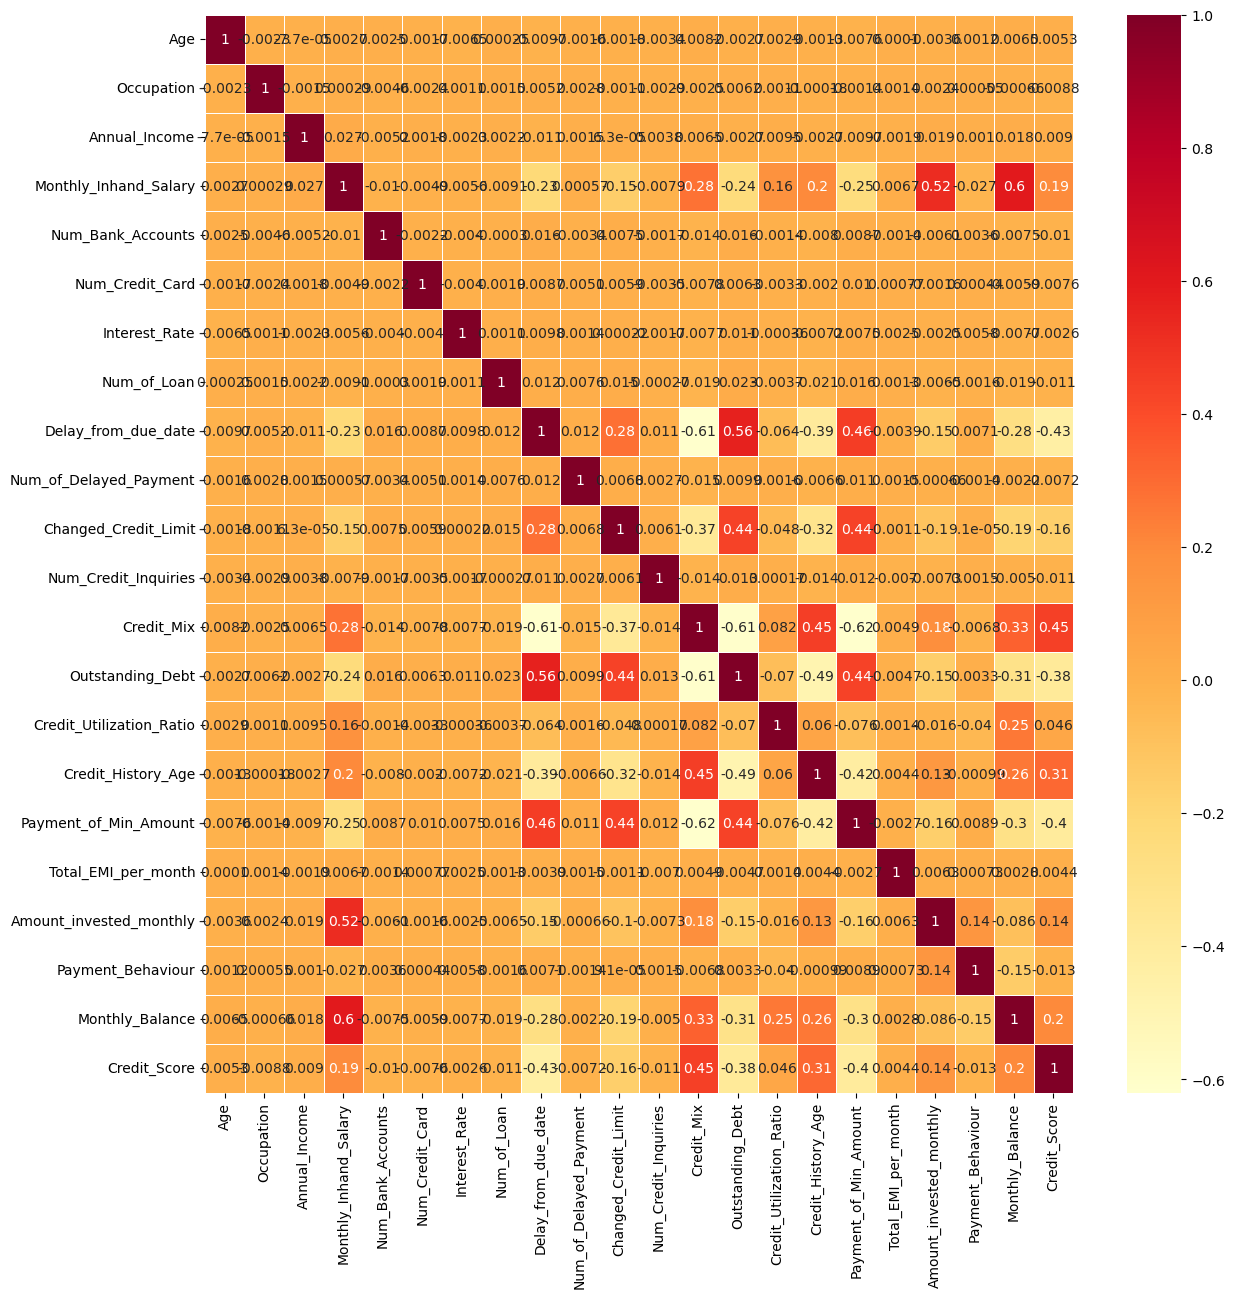

In [39]:
plt.figure(figsize = (14, 14))
sns.heatmap(df.corr() , annot=True, cmap='YlOrRd', linewidths=0.5)
plt.show()

In [66]:
X = X.drop('cluster', axis = 1)

array([[-0.97622511, -0.83630681, -0.91958403, ..., -0.69010744,
        -1.50680865,  0.02423718],
       [-0.97622511,  0.36308324, -0.91958403, ...,  0.15151971,
         1.7926182 , -0.35141815],
       [-0.97622511,  0.36308324, -0.91958403, ..., -0.66156283,
         1.13273283,  0.27655007],
       ...,
       [ 0.44104653,  0.61420038, -0.39365364, ..., -1.94342234,
        -0.18703791,  0.35098519],
       [ 0.44104653,  0.61420038, -0.39365364, ...,  0.3887787 ,
         1.7926182 ,  0.11416942],
       [ 0.29747044,  0.61420038, -0.39365364, ...,  1.23806088,
        -0.18703791,  1.11864351]])

In [41]:
# Мультиколлинеарности нет

In [67]:
import statsmodels.api as sm
model = sm.MNLogit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.802180
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99962
Method:                           MLE   Df Model:                           36
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.1996
Time:                        14:39:44   Log-Likelihood:                -80218.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income             3.556e-06   9.05e-07      3.928      0.000    1.78e-06

In [68]:
y_pred = model.predict(X)
y_pred # матрица вероятностей

,0,1,2
0,0.169548,0.500634,0.329818
1,0.128789,0.447006,0.424205
2,0.070662,0.288101,0.641236
3,0.116527,0.297012,0.586461
4,0.064719,0.352680,0.582601
...,...,...,...
99995,0.149478,0.722645,0.127877
99996,0.138443,0.709164,0.152392
99997,0.124175,0.655977,0.219848
99998,0.058817,0.638152,0.303031


In [69]:
predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Accuracy: 0.6109


In [70]:
X = X.drop(['Monthly_Inhand_Salary'], axis = 1)
model = sm.MNLogit(y, X).fit()
print(model.summary())

y_pred = model.predict(X)
predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.802195
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99964
Method:                           MLE   Df Model:                           34
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.1996
Time:                        14:40:15   Log-Likelihood:                -80220.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income             3.567e-06   6.21e-07      5.740      0.000    2.35e-06

In [71]:
X = X.drop(['Num_Bank_Accounts'], axis = 1)
model = sm.MNLogit(y, X).fit()
print(model.summary())

y_pred = model.predict(X)
predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.802331
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99966
Method:                           MLE   Df Model:                           32
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.1995
Time:                        14:41:09   Log-Likelihood:                -80233.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income             3.569e-06   6.21e-07      5.744      0.000    2.35e-06

In [72]:
X = X.drop(['Amount_invested_monthly'], axis = 1)
model = sm.MNLogit(y, X).fit()
print(model.summary())

y_pred = model.predict(X)
predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.802552
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99968
Method:                           MLE   Df Model:                           30
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.1993
Time:                        14:41:55   Log-Likelihood:                -80255.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income             4.711e-06   5.78e-07      8.154      0.000    3.58e-06

In [73]:
X = X.drop(['Total_EMI_per_month'], axis = 1)
model = sm.MNLogit(y, X).fit()
print(model.summary())

y_pred = model.predict(X)
predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.802657
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99970
Method:                           MLE   Df Model:                           28
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.1991
Time:                        14:42:23   Log-Likelihood:                -80266.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income             3.932e-06   5.25e-07      7.490      0.000     2.9e-06

In [74]:
y_pred

,0,1,2
0,0.169799,0.496605,0.333596
1,0.130951,0.448584,0.420465
2,0.072108,0.291527,0.636365
3,0.119098,0.271728,0.609174
4,0.063859,0.363484,0.572657
...,...,...,...
99995,0.145488,0.734254,0.120257
99996,0.135332,0.720492,0.144176
99997,0.118631,0.680946,0.200423
99998,0.059038,0.638270,0.302692


In [76]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y, predicted_classes, average='macro')

print("F1 макро:", f1_macro)

F1 макро: 0.5717261162284558


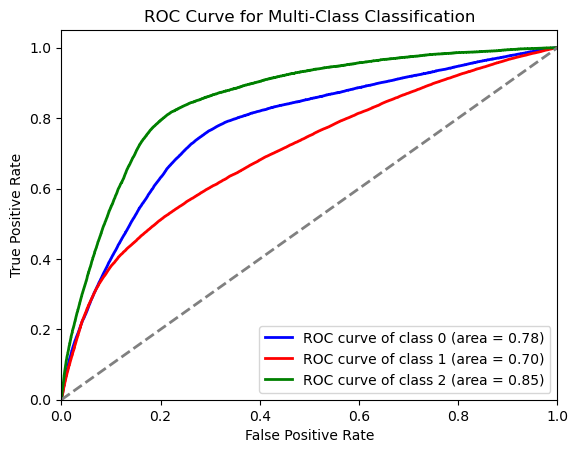

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred[i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green']  # Можно добавить больше цветов при необходимости
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13239 14205  1554]
 [ 8450 39358  5366]
 [  538  8679  8611]]


In [134]:
np.diag(conf_matrix).sum()/conf_matrix.sum()

0.61208

In [135]:
from sklearn.metrics import f1_score


f1score = f1_score(y, predicted_classes, average='weighted')
print("F1-score:", f1score)

F1-score: 0.6045860114072736


## Обогащение датасета

In [136]:
X.columns

Index(['Annual_Income', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [137]:
df.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'cluster'],
      dtype='object')

In [78]:
all_c = X['Num_Credit_Card'] + X['Num_of_Loan'] + df['Num_Bank_Accounts']
remain = df['Monthly_Inhand_Salary'] - df['Total_EMI_per_month']
remain_a = df['Annual_Income'] - df['Outstanding_Debt']
del_loan = np.where((df['Num_of_Delayed_Payment'] / df['Num_of_Loan'] == np.inf) , 0, X['Num_of_Delayed_Payment'] / X['Num_of_Loan'])

In [79]:
res = np.vstack((all_c, remain, remain_a, del_loan))
update = pd.DataFrame(res)
update = update.T
update

,0,1,2,3
0,11.0,1775.268384,18304.14,1.75
1,11.0,3044.170051,18304.14,3.50
2,11.0,3044.170051,18304.14,1.75
3,11.0,3044.170051,18304.14,1.00
4,11.0,1775.268384,18304.14,3.50
...,...,...,...,...
99995,12.0,3324.311811,39126.61,3.50
99996,12.0,3324.311811,39126.61,3.50
99997,12.0,3324.311811,39126.61,3.00
99998,12.0,3324.311811,39126.61,7.00


In [80]:
update = update.rename(columns={0: 'all_c', 1: 'remain', 2: 'remain_a', 3: 'del_loan'})
update

,all_c,remain,remain_a,del_loan
0,11.0,1775.268384,18304.14,1.75
1,11.0,3044.170051,18304.14,3.50
2,11.0,3044.170051,18304.14,1.75
3,11.0,3044.170051,18304.14,1.00
4,11.0,1775.268384,18304.14,3.50
...,...,...,...,...
99995,12.0,3324.311811,39126.61,3.50
99996,12.0,3324.311811,39126.61,3.50
99997,12.0,3324.311811,39126.61,3.00
99998,12.0,3324.311811,39126.61,7.00


In [81]:
update = update.fillna(0)
update.describe()

,all_c,remain,remain_a,del_loan
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,12.312040,2650.661096,32303.597164,4.334621
std,3.204892,1047.529517,14517.722610,3.207417
min,1.000000,234.395943,5102.640000,0.000000
25%,10.000000,1742.729788,18995.130000,2.666667
50%,13.000000,3008.505113,36206.030000,4.333333
75%,15.000000,3060.814978,37301.900000,5.000000
max,19.000000,5352.260000,69932.210000,18.000000


In [82]:
replace_outliers_with_median(update)
update.describe()

,all_c,remain,remain_a,del_loan
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.799670,2456.949219,28929.650667,3.336736
std,2.727492,795.150243,10004.277964,1.579290
min,1.000000,234.395943,5102.640000,0.000000
25%,10.000000,1742.729788,18995.130000,2.666667
50%,13.000000,3008.499514,36206.030000,4.333333
75%,14.000000,3008.532781,36206.325000,4.333333
max,15.000000,3060.814978,37301.900000,5.000000


In [83]:
X = pd.concat([X, update], axis = 1)
X

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,all_c,remain,remain_a,del_loan
0,19114.12,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,0.0,0.0,312.494089,11.0,1775.268384,18304.14,1.750000
1,19114.12,4.0,3.0,4.0,18.0,14.0,11.27,4.0,2.0,809.98,31.944960,0.0,0.0,5.0,284.629162,11.0,3044.170051,18304.14,3.500000
2,19114.12,4.0,3.0,4.0,3.0,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,0.0,4.0,331.209863,11.0,3044.170051,18304.14,1.750000
3,19114.12,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,0.0,1.0,223.451310,11.0,3044.170051,18304.14,1.000000
4,19114.12,4.0,3.0,4.0,6.0,14.0,11.27,4.0,2.0,809.98,24.797347,269.0,0.0,3.0,341.489231,11.0,1775.268384,18304.14,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6.0,7.0,2.0,23.0,7.0,11.50,3.0,1.0,502.38,34.663572,208.0,0.0,2.0,336.731225,12.0,3008.505113,36206.03,3.500000
99996,39628.99,6.0,7.0,2.0,18.0,7.0,11.50,3.0,1.0,502.38,32.305784,208.0,0.0,3.0,336.731225,12.0,3008.505113,36206.03,3.500000
99997,39628.99,6.0,13.0,2.0,27.0,6.0,11.50,3.0,2.0,502.38,32.305784,208.0,0.0,2.0,336.731225,12.0,3008.505113,36206.03,3.000000
99998,39628.99,6.0,7.0,2.0,20.0,14.0,11.50,3.0,2.0,502.38,33.638208,208.0,0.0,5.0,319.164979,12.0,3008.505113,36206.03,4.333333


In [84]:
model = sm.MNLogit(y, X).fit()
print(model.summary())

y_pred = model.predict(X)

predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.800863
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99962
Method:                           MLE   Df Model:                           36
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.2009
Time:                        14:50:29   Log-Likelihood:                -80086.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income            -8.923e-06   1.06e-06     -8.429      0.000    -1.1e-05

In [85]:
X = X.drop('all_c', axis = 1)
model = sm.MNLogit(y, X).fit()
print(model.summary())

y_pred = model.predict(X)

predicted_classes = np.argmax(y_pred.values, axis=1)  # Выбор класса с наибольшей вероятностью

# Расчет accuracy
accuracy = (predicted_classes == y).mean()
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.801135
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Credit_Score   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99964
Method:                           MLE   Df Model:                           34
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.2007
Time:                        14:50:52   Log-Likelihood:                -80113.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
          Credit_Score=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income            -8.917e-06   1.06e-06     -8.427      0.000    -1.1e-05

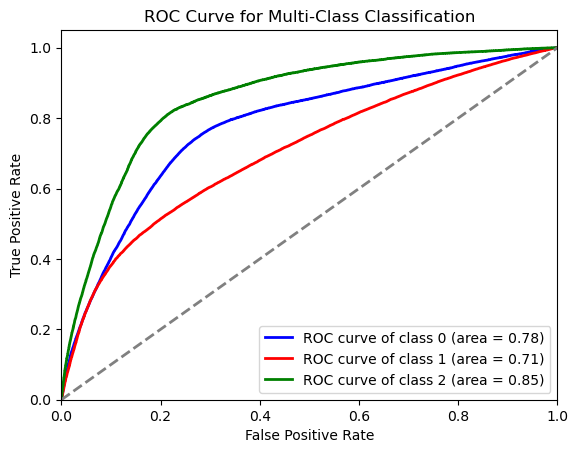

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y, y_pred[i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green']  # Можно добавить больше цветов при необходимости
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [176]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X,y)

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'P-Value': p_values})
feature_importance_df = feature_importance_df.sort_values(by='F-Score', ascending=False)

print(feature_importance_df)

                     Feature       F-Score        P-Value
8                 Credit_Mix  13671.399591   0.000000e+00
12     Payment_of_Min_Amount  10962.922180   0.000000e+00
2              Interest_Rate   7719.075889   0.000000e+00
7       Num_Credit_Inquiries   7227.600203   0.000000e+00
9           Outstanding_Debt   6865.799581   0.000000e+00
4        Delay_from_due_date   6747.511875   0.000000e+00
5     Num_of_Delayed_Payment   5959.311256   0.000000e+00
1            Num_Credit_Card   4435.622140   0.000000e+00
17                  del_loan   3618.646091   0.000000e+00
11        Credit_History_Age   3072.730736   0.000000e+00
3                Num_of_Loan   2570.593680   0.000000e+00
16                  remain_a   1669.950763   0.000000e+00
6       Changed_Credit_Limit   1448.039346   0.000000e+00
15                    remain   1326.123773   0.000000e+00
14           Monthly_Balance   1099.282688   0.000000e+00
0              Annual_Income    391.191446  5.873419e-170
13         Pay

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
# Создание модели логистической регрессии
lr = LogisticRegression()
lr.fit(X, y)

# Получение коэффициентов модели (весов) и их абсолютных значений
coefficients = lr.coef_[0]
absolute_coefficients = abs(coefficients)

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'Absolute Coefficient': absolute_coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance_df)

                     Feature  Coefficient  Absolute Coefficient
11        Credit_History_Age    -0.001831              0.001831
14           Monthly_Balance    -0.001573              0.001573
9           Outstanding_Debt     0.001201              0.001201
10  Credit_Utilization_Ratio    -0.000119              0.000119
4        Delay_from_due_date     0.000079              0.000079
7       Num_Credit_Inquiries     0.000046              0.000046
6       Changed_Credit_Limit    -0.000042              0.000042
15                    remain    -0.000037              0.000037
16                  remain_a    -0.000032              0.000032
2              Interest_Rate     0.000032              0.000032
8                 Credit_Mix    -0.000020              0.000020
0              Annual_Income     0.000017              0.000017
3                Num_of_Loan     0.000012              0.000012
13         Payment_Behaviour    -0.000009              0.000009
17                  del_loan     0.00000

In [96]:
from sklearn.preprocessing import MinMaxScaler
defolt = df[['Delay_from_due_date', 'Num_of_Delayed_Payment']]

scaler = MinMaxScaler()
defolt['prob'] = defolt['Delay_from_due_date'] * defolt['Num_of_Delayed_Payment']
defolt['prob'] = scaler.fit_transform(defolt[['prob']])
defolt

,Delay_from_due_date,Num_of_Delayed_Payment,prob
0,3.0,7.0,0.041667
1,18.0,14.0,0.500000
2,3.0,7.0,0.041667
3,5.0,4.0,0.039683
4,6.0,14.0,0.166667
...,...,...,...
99995,23.0,7.0,0.319444
99996,18.0,7.0,0.250000
99997,27.0,6.0,0.321429
99998,20.0,14.0,0.555556


In [100]:
defolt.sort_values('prob', ascending = False)

,Delay_from_due_date,Num_of_Delayed_Payment,prob
99255,28.0,18.0,1.0
28695,28.0,18.0,1.0
16627,28.0,18.0,1.0
24360,28.0,18.0,1.0
24365,28.0,18.0,1.0
...,...,...,...
91008,5.0,0.0,0.0
45329,24.0,0.0,0.0
91012,6.0,0.0,0.0
45330,23.0,0.0,0.0


## Дефолт

Почему человек не может платить по кредиту?

1) remain (ситауция, когда выплаты по кредиту слишком большие и человеку почти не на что жить)
2) 

In [92]:
df.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'cluster'],
      dtype='object')

In [91]:
(df['Total_EMI_per_month'] > df['Monthly_Inhand_Salary']).sum()

0

In [180]:
np.argmin(X['remain'])

83641

In [182]:
df.iloc[83641]

Annual_Income               7039.745000
Monthly_Inhand_Salary        303.645417
Num_Bank_Accounts              6.000000
Num_Credit_Card                5.000000
Interest_Rate                 20.000000
Num_of_Loan                    3.000000
Delay_from_due_date           18.000000
Num_of_Delayed_Payment        14.000000
Changed_Credit_Limit           9.400000
Num_Credit_Inquiries           6.000000
Credit_Mix                     1.000000
Outstanding_Debt            1166.370000
Credit_Utilization_Ratio      27.037125
Credit_History_Age            69.000000
Payment_of_Min_Amount          1.000000
Total_EMI_per_month           69.249473
Amount_invested_monthly       19.088089
Payment_Behaviour              5.000000
Monthly_Balance              237.633697
Name: 83641, dtype: float64